# Information

In this exercise we will computationally determine the area of the Mandelbrot set. 

ALL IMPORTS HERE:

In [11]:
import numpy as np
import matplotlib.pyplot as plt

ALL GLOBAL CONSTANTS HERE:

In [12]:
# Section (i)
MAX_ITERATIONS = 255

# Section (ii)

# Section (iii)

# Section (iv)

### (i) Visualizing the Mandelbrot set

(~Ayman: feel free to change name of variables, add docstrings, change code, etc... I will try to do this later. Also, we should read PEP 8.)

In [13]:
def mandelbrot_sequence(c,iter):
    """
    [I forgot which format was prominent.]
        Returns the iteration after which the Mandelbrot sequence diverges. 
        It can be easily shown that this occers when |z_n| > 2. 

        Keyword arguments:
        c -- complex number (being tested whether it is in the Mandelbrot set) 
    """
    z = 0
    counter = 0
    while abs(z) <= 2 and counter < iter:
        counter += 1
        z = z ** 2 + c
    return counter

In [14]:
print(mandelbrot_sequence(c=1,iter=MAX_ITERATIONS))

3


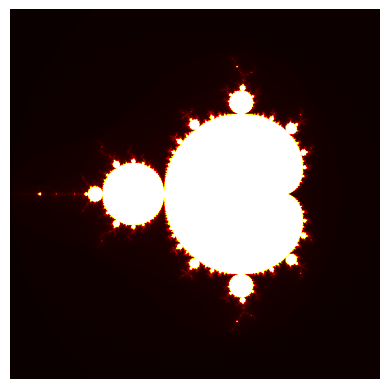

In [15]:
def plot_mandelbrot_fractal(real_min, real_max, imaginary_min, imaginary_max, width, height):
    """
        Inspiration from wiki python + pseudo code. (I will add a description later.)
        I will also add comments later when I have time.
    """
    image = np.zeros(shape = (height, width))

    real_range = np.linspace(real_min, real_max, width)
    imaginary_range = np.linspace(imaginary_min, imaginary_max, height)

    for i, real in enumerate(real_range):
        for j, imaginary in enumerate(imaginary_range):
            c = complex(real, imaginary)
            image[j, i] = mandelbrot_sequence(c=c,iter=MAX_ITERATIONS)

    _, ax = plt.subplots()
    ax.imshow(image, cmap="hot", extent=(real_min, real_max, imaginary_min, imaginary_max))
    ax.axis("off")
    plt.show()

            
plot_mandelbrot_fractal(-2, 1, -1.5, 1.5, 1000, 850) # change width and height accordingly

            


### (ii) Finding the area using Monte-Carlo:

In [ ]:
def mandelbrot_area(num_iteration,num_sample, real_min, real_max, imaginary_min, imaginary_max):
    N = 0
    bounded = 0
    while N < num_sample:
        N += 1
        c = complex(np.random.uniform(real_min, real_max), np.random.uniform(imaginary_min, imaginary_max))
        iterations = mandelbrot_sequence(c, num_iteration)
        if iterations == num_iteration:
            bounded +=1
    
    area = 9 * bounded / num_sample

    return area


In [20]:
num_iterations = np.logspace(2,3,num=2)
num_samples = np.logspace(2,3,num=2)

results = np.zeros((len(num_iterations),len(num_samples)))
for i, iteration in enumerate(num_iterations):
    for j, sample in enumerate(num_samples):
        results[i,j] = mandelbrot_area(iteration,sample, -2, 1, -1.5, 1.5)


In [21]:
print(results)

[[1.53  1.611]
 [1.17  1.674]]
